In [22]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [47]:
df = pd.read_csv('../data/meteo_18-21.csv')
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df.sort_index(inplace=True)
df.head()


,nb,temp,wind,rain,Month
date,,,,,
2018-04-10,3062,1.23,2.60,0.02,4
2018-04-11,9599,2.60,5.46,0.04,4
2018-04-12,9611,3.22,3.83,0.20,4
2018-04-13,12738,3.97,4.24,0.15,4
2018-04-14,6854,1.32,7.25,1.33,4


In [16]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

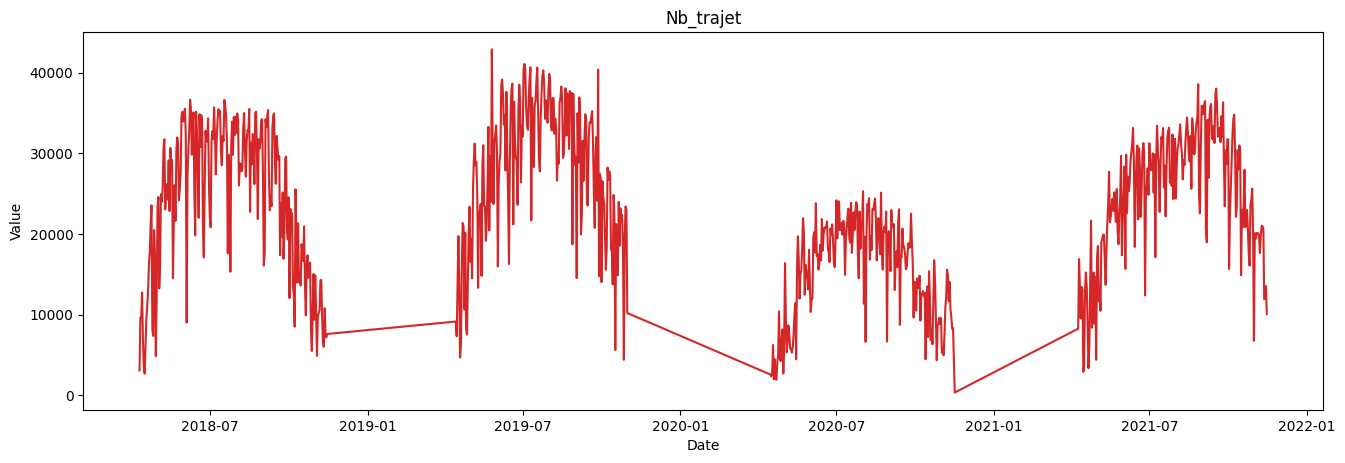

In [17]:
plot_df(df2, x=df2.date, y=df2.nb, title='Nb_trajet')

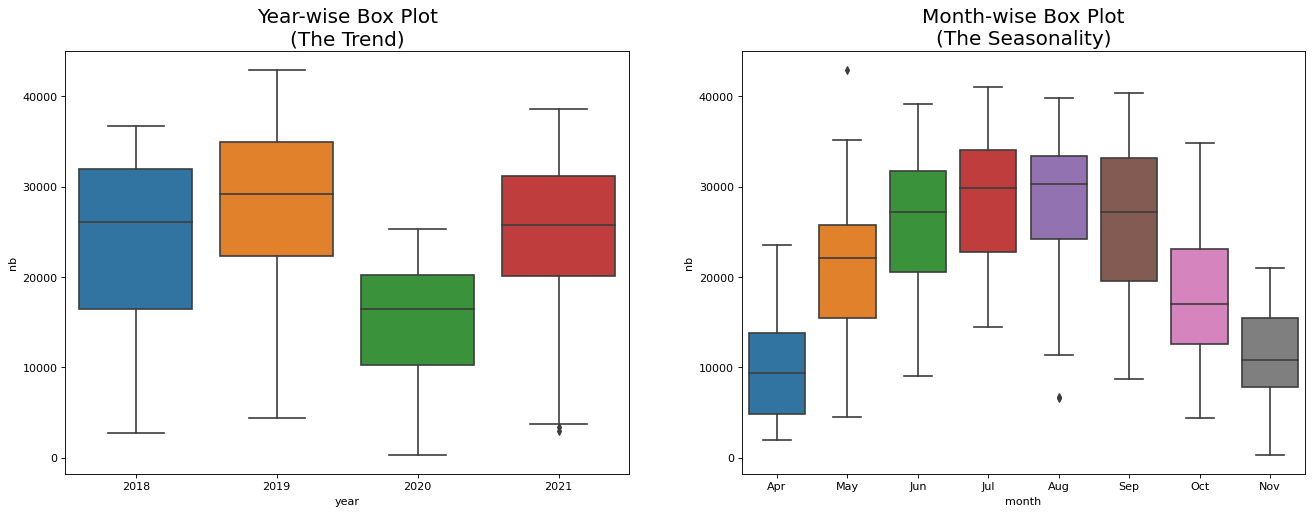

In [18]:
df2.reset_index(inplace=True)

# Prepare data
df2['year'] = [d.year for d in df2.date]
df2['month'] = [d.strftime('%b') for d in df2.date]
years = df2['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='nb', data=df2, ax=axes[0])
sns.boxplot(x='month', y='nb', data=df2.loc[~df2.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

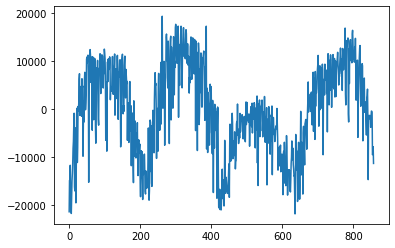

In [43]:
from scipy import signal
detrended = signal.detrend(df2.nb)
plt.plot(detrended)

In [64]:
df_complete = df.asfreq('d').fillna(0)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

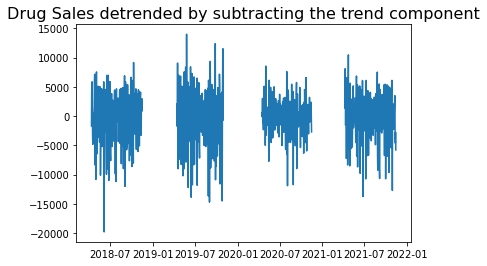

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df_complete['nb'], model='additive', extrapolate_trend='freq')
detrended = df.nb - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

[]

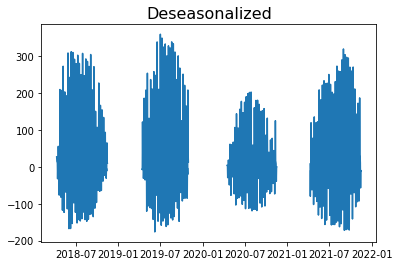

In [70]:
deseasonalized = df.nb / result_mul.seasonal
plt.plot(deseasonalized)
plt.title('Deseasonalized', fontsize=16)
plt.plot()